# Air quality in München during 2019 and 2020

These datasets extracted from the Website of the Bayern state office of the environment concern mainly 3 air pollutants : 
Nitrogen Dioxide NO2 , particulate matter PM2.5 , Carbon dioxide CO
during the months of January and april in 2019/2020. The focus was on these months since the measures taken due to the spread of covid-19 were in this period of the year.
Link: https://www.lfu.bayern.de/luft/immissionsmessungen/messwertarchiv/index.htm

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# NO2 emissions during January.2020

In [35]:
# read the data values of Jan.2020 that concern NO2 emissions in the city of munich
dataNO2_Jan_hourly = pd.read_excel('NO2_2020_01.xls',header=2, usecols =['Zeitpunkt','München/Allach','München/Johanneskirchen','München/Landshuter Allee','München/Lothstraße','München/Stachus'] )
# shape and data types of the data
print(dataNO2_Jan_hourly.shape)
print(dataNO2_Jan_hourly.dtypes)

# select numeric columns
df_numeric = dataNO2_Jan_hourly.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = dataNO2_Jan_hourly.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


(744, 6)
Zeitpunkt                   object
München/Allach               int64
München/Johanneskirchen      int64
München/Landshuter Allee    object
München/Lothstraße          object
München/Stachus             object
dtype: object
['München/Allach' 'München/Johanneskirchen']
['Zeitpunkt' 'München/Landshuter Allee' 'München/Lothstraße'
 'München/Stachus']


In [36]:
# print the data to understand its components
dataNO2_Jan_hourly

,Zeitpunkt,München/Allach,München/Johanneskirchen,München/Landshuter Allee,München/Lothstraße,München/Stachus
0,01.01.2020 01:00,41,43,58,49,46
1,01.01.2020 02:00,29,32,62,47,50
2,01.01.2020 03:00,36,33,49,46,50
3,01.01.2020 04:00,34,31,45,43,45
4,01.01.2020 05:00,33,31,44,42,44
...,...,...,...,...,...,...
739,31.01.2020 20:00,14,15,83,37,59
740,31.01.2020 21:00,11,19,72,29,33
741,31.01.2020 22:00,16,17,47,25,28
742,31.01.2020 23:00,15,19,49,24,35


In [37]:
# replace the '#' values (missing values) with nan
for (columnName, columnData) in dataNO2_Jan_hourly.iteritems():
    dataNO2_Jan_hourly[columnName] = dataNO2_Jan_hourly[columnName].replace('    # ', np.nan)

In [38]:
# counting the missing values
print(dataNO2_Jan_hourly.isnull().sum())

Zeitpunkt                   0
München/Allach              0
München/Johanneskirchen     0
München/Landshuter Allee    5
München/Lothstraße          4
München/Stachus             1
dtype: int64


In [39]:
# fill the missing values with the last valid observation 
for (columnName, columnData) in dataNO2_Jan_hourly.iteritems():
    dataNO2_Jan_hourly[columnName] =  dataNO2_Jan_hourly[columnName].fillna(method='ffill')
# check if they were properly filled   
print(dataNO2_Jan_hourly.isnull().sum())
# replace the hour description 24:00 with 00:00 
dataNO2_Jan_hourly['Zeitpunkt']=dataNO2_Jan_hourly['Zeitpunkt'].replace({'24:00':'00:00'}, regex=True)
dataNO2_Jan_hourly

Zeitpunkt                   0
München/Allach              0
München/Johanneskirchen     0
München/Landshuter Allee    0
München/Lothstraße          0
München/Stachus             0
dtype: int64


,Zeitpunkt,München/Allach,München/Johanneskirchen,München/Landshuter Allee,München/Lothstraße,München/Stachus
0,01.01.2020 01:00,41,43,58.0,49.0,46.0
1,01.01.2020 02:00,29,32,62.0,47.0,50.0
2,01.01.2020 03:00,36,33,49.0,46.0,50.0
3,01.01.2020 04:00,34,31,45.0,43.0,45.0
4,01.01.2020 05:00,33,31,44.0,42.0,44.0
...,...,...,...,...,...,...
739,31.01.2020 20:00,14,15,83.0,37.0,59.0
740,31.01.2020 21:00,11,19,72.0,29.0,33.0
741,31.01.2020 22:00,16,17,47.0,25.0,28.0
742,31.01.2020 23:00,15,19,49.0,24.0,35.0


In [40]:
# split the Zeitpunkt column into two columns for further preprocessing reasons
dataNO2_Jan_hourly[['Day','Hour']] = dataNO2_Jan_hourly['Zeitpunkt'].str.split(expand=True) 
# regroup the hourly data into daily data
dataNO2_Jan_daily = dataNO2_Jan_hourly.groupby(['Day']).sum()  
dataNO2_Jan_daily

,München/Allach,München/Johanneskirchen,München/Landshuter Allee,München/Lothstraße,München/Stachus
Day,,,,,
01.01.2020,764,695,1021.0,874.0,928.0
02.01.2020,693,746,1272.0,925.0,1100.0
03.01.2020,575,675,1557.0,896.0,1109.0
04.01.2020,185,189,975.0,348.0,769.0
05.01.2020,498,456,1177.0,658.0,856.0
06.01.2020,837,804,1645.0,1113.0,1121.0
07.01.2020,899,948,2097.0,1343.0,1511.0
08.01.2020,1115,1191,2059.0,1443.0,1307.0
09.01.2020,1128,1014,2295.0,1478.0,1536.0


       München/Allach  München/Johanneskirchen  München/Landshuter Allee  \
count       31.000000                31.000000                 31.000000   
mean       777.193548               739.741935               1598.645161   
std        318.895952               298.345545                415.895063   
min        181.000000               189.000000                975.000000   
25%        571.500000               536.500000               1245.000000   
50%        801.000000               746.000000               1605.000000   
75%        970.000000               964.000000               1892.000000   
max       1404.000000              1331.000000               2477.000000   

       München/Lothstraße  München/Stachus  
count           31.000000        31.000000  
mean           955.548387      1157.709677  
std            345.425230       259.030139  
min            348.000000       757.000000  
25%            692.000000       970.000000  
50%            896.000000      1121.000000  


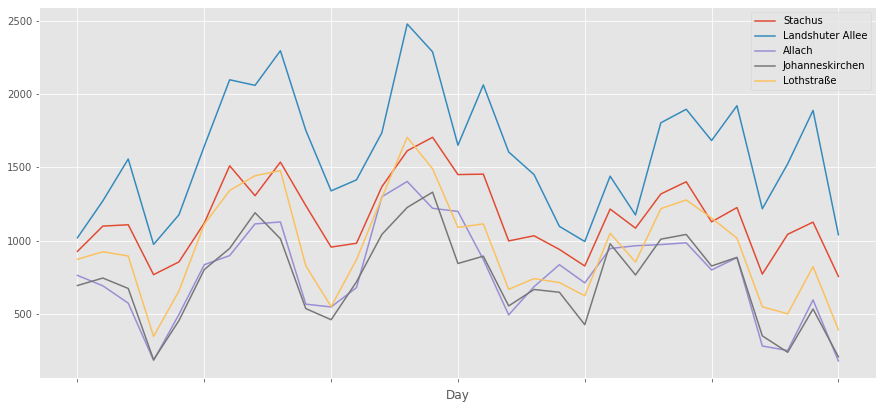

In [41]:
# show a detailed description of the dataset
print(dataNO2_Jan_daily.describe())
# visualize the NO2 emissions in the different districts of munich during the month of january
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(211)

ax.plot(np.arange(dataNO2_Jan_daily.shape[0]),dataNO2_Jan_daily['München/Stachus'],label='Stachus')
ax.plot(np.arange(dataNO2_Jan_daily.shape[0]),dataNO2_Jan_daily['München/Landshuter Allee'],label='Landshuter Allee')
ax.plot(np.arange(dataNO2_Jan_daily.shape[0]),dataNO2_Jan_daily['München/Allach'],label='Allach')
ax.plot(np.arange(dataNO2_Jan_daily.shape[0]),dataNO2_Jan_daily['München/Johanneskirchen'],label='Johanneskirchen')
ax.plot(np.arange(dataNO2_Jan_daily.shape[0]),dataNO2_Jan_daily['München/Lothstraße'],label='Lothstraße')
ax.legend()
ax.set_xticklabels([])
plt.xlabel('Day')
plt.show()

# NO2 emissions during April.2020

In [42]:
# read the data values of Apr.2020 that concern the city of munich
dataNO2_Apr_hourly = pd.read_excel('NO2_2020_04.xls',header=2, usecols =['Zeitpunkt','München/Allach','München/Johanneskirchen','München/Landshuter Allee','München/Lothstraße','München/Stachus'] )
# shape and data types of the data
print(dataNO2_Apr_hourly.shape)
print(dataNO2_Apr_hourly.dtypes)

# select numeric columns
df_numeric = dataNO2_Apr_hourly.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = dataNO2_Apr_hourly.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(720, 6)
Zeitpunkt                   object
München/Allach               int64
München/Johanneskirchen     object
München/Landshuter Allee     int64
München/Lothstraße           int64
München/Stachus              int64
dtype: object
['München/Allach' 'München/Landshuter Allee' 'München/Lothstraße'
 'München/Stachus']
['Zeitpunkt' 'München/Johanneskirchen']


            Zeitpunkt  München/Allach München/Johanneskirchen  \
0    01.04.2020 01:00              27                      13   
1    01.04.2020 02:00              28                      15   
2    01.04.2020 03:00              40                      16   
3    01.04.2020 04:00              43                      24   
4    01.04.2020 05:00              50                      27   
..                ...             ...                     ...   
715  30.04.2020 20:00               9                      11   
716  30.04.2020 21:00               6                       6   
717  30.04.2020 22:00               4                       6   
718  30.04.2020 23:00               6                       6   
719  30.04.2020 24:00               3                       6   

     München/Landshuter Allee  München/Lothstraße  München/Stachus  
0                          21                  17               19  
1                          24                  21               23  
2           

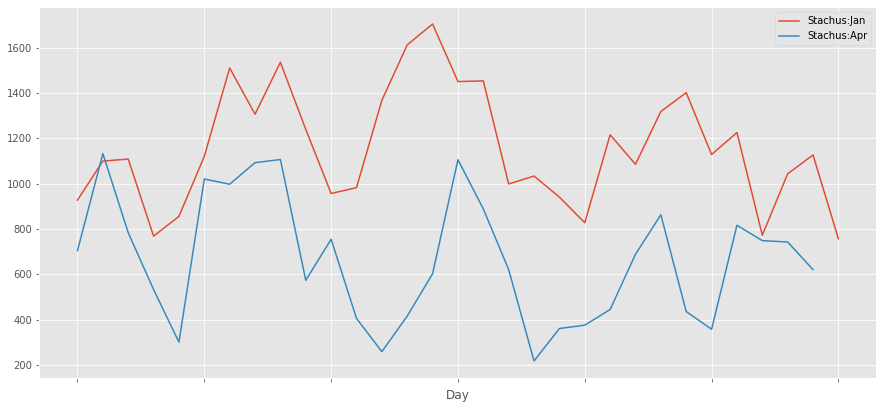

In [43]:
print(dataNO2_Apr_hourly)
# replacing the missing values with nan
for (columnName, columnData) in dataNO2_Apr_hourly.iteritems():
    dataNO2_Apr_hourly[columnName] = dataNO2_Apr_hourly[columnName].replace('    # ', np.nan)
# counting the nbr of missing values
print(dataNO2_Apr_hourly.isnull().sum())
# filling the missing values with relevant values
for (columnName, columnData) in dataNO2_Apr_hourly.iteritems():
    dataNO2_Apr_hourly[columnName] =  dataNO2_Apr_hourly[columnName].fillna(method='ffill')
print(dataNO2_Apr_hourly.isnull().sum())

# replacing the hour format due to further preprocessing steps
dataNO2_Apr_hourly['Zeitpunkt']=dataNO2_Apr_hourly['Zeitpunkt'].replace({'24:00':'00:00'}, regex=True)
# split the datetime column into two columns that contain the Day and Hour
dataNO2_Apr_hourly[['Day','Hour']] = dataNO2_Apr_hourly['Zeitpunkt'].str.split(expand=True) 
# transform the hourly data to daily data
dataNO2_Apr_daily = dataNO2_Apr_hourly.groupby(['Day']).sum()  
print(dataNO2_Apr_daily)
# description of the features values
print(dataNO2_Apr_daily.describe())

# plot of the difference of the emissions between Jan and Apr in the district of Stachus
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(211)
ax.plot(np.arange(dataNO2_Jan_daily.shape[0]),dataNO2_Jan_daily['München/Stachus'],label='Stachus:Jan')
ax.plot(np.arange(dataNO2_Apr_daily.shape[0]),dataNO2_Apr_daily['München/Stachus'],label='Stachus:Apr')
ax.legend()
ax.set_xticklabels([])
plt.xlabel('Day')
plt.show()

# NO2 emissions in 2019

In [44]:
# read the data values of 2019 that concern NO2 emissions in the city of munich
dataNO2_2019_hourly = pd.read_excel('NO2_2019.xlsx',header=1,usecols =['Zeitpunkt','München/Allach','München/Johanneskirchen','München/Landshuter Allee','München/Lothstraße','München/Stachus'] )
# shape and data types of the data
print(dataNO2_2019_hourly.shape)
print(dataNO2_2019_hourly.dtypes)

# select numeric columns
df_numeric = dataNO2_2019_hourly.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = dataNO2_2019_hourly.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
dataNO2_2019_hourly

(8761, 6)
Zeitpunkt                   object
München/Allach              object
München/Johanneskirchen     object
München/Landshuter Allee    object
München/Lothstraße          object
München/Stachus             object
dtype: object
[]
['Zeitpunkt' 'München/Allach' 'München/Johanneskirchen'
 'München/Landshuter Allee' 'München/Lothstraße' 'München/Stachus']


,Zeitpunkt,München/Allach,München/Johanneskirchen,München/Landshuter Allee,München/Lothstraße,München/Stachus
0,01.01.2019 01:00,17,39,48,39,44
1,01.01.2019 02:00,12,38,57,35,43
2,01.01.2019 03:00,11,23,43,27,34
3,01.01.2019 04:00,10,17,22,18,30
4,01.01.2019 05:00,8,14,20,17,33
...,...,...,...,...,...,...
8756,31.12.2019 21:00,52,43,65,57,54
8757,31.12.2019 22:00,48,43,51,49,56
8758,31.12.2019 23:00,46,43,59,47,50
8759,31.12.2019 24:00,44,41,55,49,49


In [45]:
# replace the '#' values (missing values) with nan
for (columnName, columnData) in dataNO2_2019_hourly.iteritems():
    dataNO2_2019_hourly[columnName] = dataNO2_2019_hourly[columnName].replace('    # ', np.nan)
# count the missing values
print(dataNO2_2019_hourly.isnull().sum())
# fill the missing values with the last valid observation
for (columnName, columnData) in dataNO2_2019_hourly.iteritems():
    dataNO2_2019_hourly[columnName] =  dataNO2_2019_hourly[columnName].fillna(method='ffill')
# check if they were properly filled 
print(dataNO2_2019_hourly.isnull().sum())

Zeitpunkt                    0
München/Allach              12
München/Johanneskirchen     16
München/Landshuter Allee    21
München/Lothstraße          15
München/Stachus             14
dtype: int64
Zeitpunkt                   0
München/Allach              0
München/Johanneskirchen     0
München/Landshuter Allee    0
München/Lothstraße          0
München/Stachus             0
dtype: int64


In [46]:
# replace the hour values 24:00 with 00:00
dataNO2_2019_hourly['Zeitpunkt']=dataNO2_2019_hourly['Zeitpunkt'].replace({'24:00':'00:00'}, regex=True)
dataNO2_2019_hourly.drop(dataNO2_2019_hourly.tail(1).index,inplace=True)
#Convert the Zeitpunkt column to datetime 
dataNO2_2019_hourly['Zeitpunkt']=pd.to_datetime(dataNO2_2019_hourly['Zeitpunkt'], infer_datetime_format=True)
# set it as an index of the data 
dataNO2_2019_hourly = dataNO2_2019_hourly.set_index(['Zeitpunkt'])
dataNO2_2019_hourly
# resample the hourly data into a daily data
dataNO2_2019_daily=dataNO2_2019_hourly.resample('D').sum()
dataNO2_2019_daily

,München/Allach,München/Johanneskirchen,München/Landshuter Allee,München/Lothstraße,München/Stachus
Zeitpunkt,,,,,
2019-01-01,119.0,318.0,685.0,382.0,598.0
2019-01-02,1175.0,951.0,1682.0,1216.0,1367.0
2019-01-03,176.0,289.0,1548.0,553.0,985.0
2019-01-04,641.0,388.0,984.0,478.0,843.0
2019-01-05,495.0,471.0,1555.0,583.0,850.0
...,...,...,...,...,...
2019-12-27,622.0,530.0,1253.0,660.0,995.0
2019-12-28,653.0,567.0,1089.0,602.0,856.0
2019-12-29,811.0,618.0,990.0,753.0,872.0


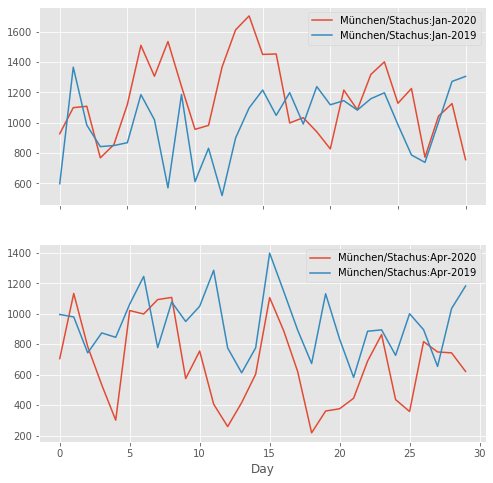

In [47]:
# extract the data of both months January and April 
dataNO2_2019_Jan_daily = dataNO2_2019_daily['2019-01-01':'2019-01-31']
dataNO2_2019_Apr_daily = dataNO2_2019_daily['2019-04-01':'2019-04-30']

# visualize the change of emissions between 2019 and 2020 in the district of stachus
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(np.arange(dataNO2_Jan_daily.shape[0]),dataNO2_Jan_daily['München/Stachus'],label='München/Stachus:Jan-2020')
ax1.plot(np.arange(dataNO2_2019_Jan_daily.shape[0]),dataNO2_2019_Jan_daily['München/Stachus'],label='München/Stachus:Jan-2019')
ax1.legend()

ax2.plot(np.arange(dataNO2_Apr_daily.shape[0]),dataNO2_Apr_daily['München/Stachus'],label='München/Stachus:Apr-2020')
ax2.plot(np.arange(dataNO2_2019_Apr_daily.shape[0]),dataNO2_2019_Apr_daily['München/Stachus'],label='München/Stachus:Apr-2019')

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
ax2.legend()
plt.xlabel('Day')
plt.show()

# PM2.5 emissions in Jan.2020

In [48]:
# read the data
dataPm2x5_Jan_hourly = pd.read_excel('PM2x5_2020_01.xls',header=2,usecols =['Zeitpunkt','München/Johanneskirchen','München/Landshuter Allee','München/Lothstraße','München/Stachus'] )
# shape and data types of the data
print(dataPm2x5_Jan_hourly.shape)
print(dataPm2x5_Jan_hourly.dtypes)

# select numeric columns
df_numeric = dataPm2x5_Jan_hourly.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = dataPm2x5_Jan_hourly.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


(744, 5)
Zeitpunkt                   datetime64[ns]
München/Johanneskirchen              int64
München/Landshuter Allee             int64
München/Lothstraße                   int64
München/Stachus                      int64
dtype: object
['München/Johanneskirchen' 'München/Landshuter Allee' 'München/Lothstraße'
 'München/Stachus']
['Zeitpunkt']


In [49]:
print(dataPm2x5_Jan_hourly)
# find the missing values
for (columnName, columnData) in dataPm2x5_Jan_hourly.iteritems():
    dataPm2x5_Jan_hourly[columnName] = dataPm2x5_Jan_hourly[columnName].replace('    # ', np.nan)
print(dataPm2x5_Jan_hourly.isnull().sum())


              Zeitpunkt  München/Johanneskirchen  München/Landshuter Allee  \
0   2020-01-01 01:00:00                      247                       488   
1   2020-01-01 02:00:00                      300                       813   
2   2020-01-01 03:00:00                      521                       614   
3   2020-01-01 04:00:00                      555                       418   
4   2020-01-01 05:00:00                      337                       237   
..                  ...                      ...                       ...   
739 2020-01-31 20:00:00                        2                         9   
740 2020-01-31 21:00:00                        3                         9   
741 2020-01-31 22:00:00                        5                         8   
742 2020-01-31 23:00:00                        4                         8   
743 2020-02-01 00:00:00                        5                         8   

     München/Lothstraße  München/Stachus  
0                   

Zeitpunkt                   0
München/Johanneskirchen     0
München/Landshuter Allee    0
München/Lothstraße          0
München/Stachus             0
dtype: int64
            München/Johanneskirchen  München/Landshuter Allee  \
Day                                                             
2020-01-01                     3084                      3573   
2020-01-02                      690                       802   
2020-01-03                      232                       423   
2020-01-04                       99                       150   
2020-01-05                      218                       259   
2020-01-06                      339                       361   
2020-01-07                      285                       368   
2020-01-08                      234                       373   
2020-01-09                      187                       360   
2020-01-10                       91                       249   
2020-01-11                      201                      

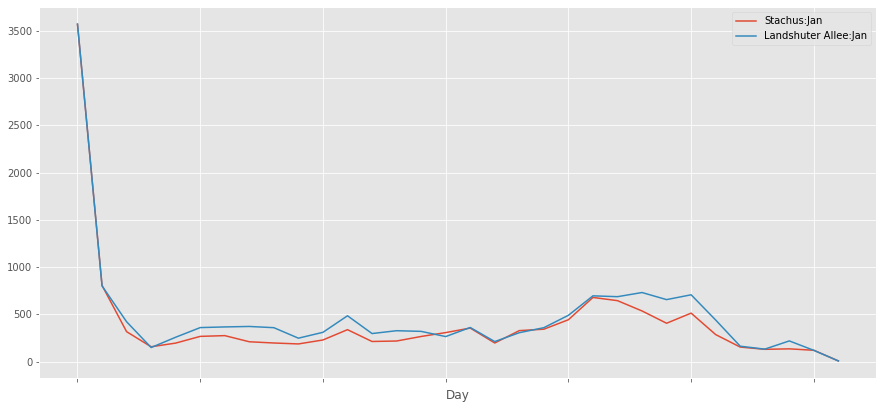

In [50]:
# replace the missing values with relevant ones
for (columnName, columnData) in dataPm2x5_Jan_hourly.iteritems():
    dataPm2x5_Jan_hourly[columnName] =  dataPm2x5_Jan_hourly[columnName].fillna(method='ffill')
print(dataPm2x5_Jan_hourly.isnull().sum())
# split the Datetime column 
dataPm2x5_Jan_hourly[['Day','Hour']] = dataPm2x5_Jan_hourly['Zeitpunkt'].astype(str).str.split(expand=True) 
# transform the hourly data to daily data
dataPm2x5_Jan_daily = dataPm2x5_Jan_hourly.groupby(['Day']).sum()  
print(dataPm2x5_Jan_daily)
# describe the features of the dataset
print(dataPm2x5_Jan_daily.describe())
# plot emissions in both ditricts Stachus and Landshuter Alle during the month of January
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(211)
ax.plot(np.arange(dataPm2x5_Jan_daily.shape[0]),dataPm2x5_Jan_daily['München/Stachus'],label='Stachus:Jan')
ax.plot(np.arange(dataPm2x5_Jan_daily.shape[0]),dataPm2x5_Jan_daily['München/Landshuter Allee'],label='Landshuter Allee:Jan')
ax.legend()
ax.set_xticklabels([])
plt.xlabel('Day')
plt.show()

# PM2.5 emissions during apr.2020

In [51]:
# read the data
dataPm2x5_Apr_hourly = pd.read_excel('PM2x5_2020_04.xls',header=2,usecols =['Zeitpunkt','München/Johanneskirchen','München/Landshuter Allee','München/Lothstraße','München/Stachus'] )
# shape and data types of the data
print(dataPm2x5_Apr_hourly.shape)
print(dataPm2x5_Apr_hourly.dtypes)

# select numeric columns
df_numeric = dataPm2x5_Apr_hourly.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = dataPm2x5_Apr_hourly.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


(720, 5)
Zeitpunkt                   datetime64[ns]
München/Johanneskirchen              int64
München/Landshuter Allee             int64
München/Lothstraße                  object
München/Stachus                      int64
dtype: object
['München/Johanneskirchen' 'München/Landshuter Allee' 'München/Stachus']
['Zeitpunkt' 'München/Lothstraße']


In [52]:
print(dataPm2x5_Apr_hourly)
for (columnName, columnData) in dataPm2x5_Apr_hourly.iteritems():
    dataPm2x5_Apr_hourly[columnName] = dataPm2x5_Apr_hourly[columnName].replace('    # ', np.nan)
print(dataPm2x5_Apr_hourly.isnull().sum())


              Zeitpunkt  München/Johanneskirchen  München/Landshuter Allee  \
0   2020-04-01 01:00:00                       19                        14   
1   2020-04-01 02:00:00                       22                        14   
2   2020-04-01 03:00:00                       22                        15   
3   2020-04-01 04:00:00                       23                        16   
4   2020-04-01 05:00:00                       20                        18   
..                  ...                      ...                       ...   
715 2020-04-30 20:00:00                        1                         7   
716 2020-04-30 21:00:00                        1                         5   
717 2020-04-30 22:00:00                        1                         4   
718 2020-04-30 23:00:00                        1                         4   
719 2020-05-01 00:00:00                        1                         3   

    München/Lothstraße  München/Stachus  
0                   1

Zeitpunkt                   0
München/Johanneskirchen     0
München/Landshuter Allee    0
München/Lothstraße          0
München/Stachus             0
dtype: int64
            München/Johanneskirchen  München/Landshuter Allee  \
Day                                                             
2020-04-01                      402                       387   
2020-04-02                      454                       469   
2020-04-03                      434                       491   
2020-04-04                      343                       359   
2020-04-05                      310                       284   
2020-04-06                      324                       400   
2020-04-07                      390                       373   
2020-04-08                      452                       443   
2020-04-09                      368                       372   
2020-04-10                      438                       398   
2020-04-11                      304                      

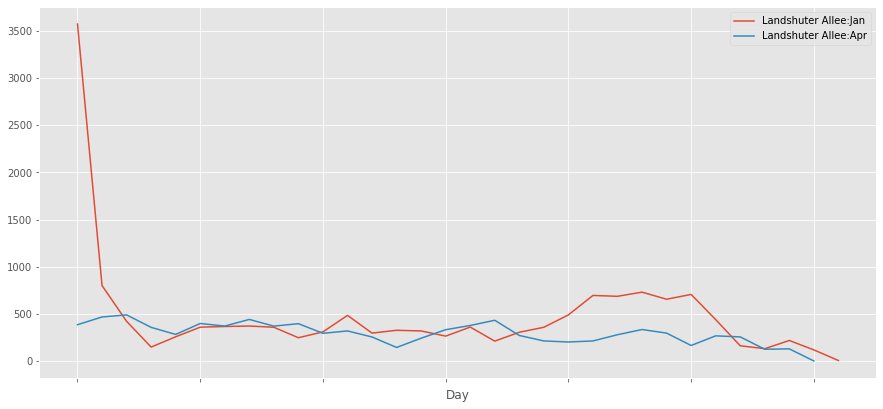

In [53]:
# fill missing values 
for (columnName, columnData) in dataPm2x5_Apr_hourly.iteritems():
    dataPm2x5_Apr_hourly[columnName] =  dataPm2x5_Apr_hourly[columnName].fillna(method='ffill')
print(dataPm2x5_Apr_hourly.isnull().sum())
#transform hourly data to daily data
dataPm2x5_Apr_hourly[['Day','Hour']] = dataPm2x5_Apr_hourly['Zeitpunkt'].astype(str).str.split(expand=True) 
dataPm2x5_Apr_daily = dataPm2x5_Apr_hourly.groupby(['Day']).sum() 
print(dataPm2x5_Apr_daily)
# describe data features
print(dataPm2x5_Apr_daily.describe())
#plot the change of emissions in the district Landshuter Allee between January and april
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(211)
ax.plot(np.arange(dataPm2x5_Jan_daily.shape[0]),dataPm2x5_Jan_daily['München/Landshuter Allee'],label='Landshuter Allee:Jan')
ax.plot(np.arange(dataPm2x5_Apr_daily.shape[0]),dataPm2x5_Apr_daily['München/Landshuter Allee'],label='Landshuter Allee:Apr')
ax.legend()
ax.set_xticklabels([])
plt.xlabel('Day')
plt.show()

# PM2.5 emissions during 2019

In [54]:
# read the data
dataPm2x5_2019_hourly = pd.read_excel('PM2x5_2019.xlsx',header=1,usecols =['Zeitpunkt','München/Johanneskirchen','München/Landshuter Allee','München/Lothstraße','München/Stachus'] )
# shape and data types of the data
print(dataPm2x5_2019_hourly.shape)
print(dataPm2x5_2019_hourly.dtypes)

# select numeric columns
df_numeric = dataPm2x5_2019_hourly.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = dataPm2x5_2019_hourly.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


(8761, 5)
Zeitpunkt                   object
München/Johanneskirchen     object
München/Landshuter Allee    object
München/Lothstraße          object
München/Stachus             object
dtype: object
[]
['Zeitpunkt' 'München/Johanneskirchen' 'München/Landshuter Allee'
 'München/Lothstraße' 'München/Stachus']


In [55]:
print(dataPm2x5_2019_hourly)
for (columnName, columnData) in dataPm2x5_2019_hourly.iteritems():
    dataPm2x5_2019_hourly[columnName] = dataPm2x5_2019_hourly[columnName].replace('    # ', np.nan)
print(dataPm2x5_2019_hourly.isnull().sum())

             Zeitpunkt München/Johanneskirchen München/Landshuter Allee  \
0     01.01.2019 01:00                     382                      777   
1     01.01.2019 02:00                     348                      196   
2     01.01.2019 03:00                      88                       88   
3     01.01.2019 04:00                      37                       34   
4     01.01.2019 05:00                      30                       27   
...                ...                     ...                      ...   
8756  31.12.2019 21:00                      52                       60   
8757  31.12.2019 22:00                      35                       46   
8758  31.12.2019 23:00                      38                       57   
8759  31.12.2019 24:00                      51                       98   
8760               0/0                     NaN                      NaN   

     München/Lothstraße München/Stachus  
0                   505             491  
1              

Zeitpunkt                   0
München/Johanneskirchen     0
München/Landshuter Allee    0
München/Lothstraße          0
München/Stachus             0
dtype: int64
                     München/Johanneskirchen  München/Landshuter Allee  \
Zeitpunkt                                                                
2019-01-01 01:00:00                    382.0                     777.0   
2019-01-01 02:00:00                    348.0                     196.0   
2019-01-01 03:00:00                     88.0                      88.0   
2019-01-01 04:00:00                     37.0                      34.0   
2019-01-01 05:00:00                     30.0                      27.0   
...                                      ...                       ...   
2019-12-31 20:00:00                     28.0                      51.0   
2019-12-31 21:00:00                     52.0                      60.0   
2019-12-31 22:00:00                     35.0                      46.0   
2019-12-31 23:00:00    

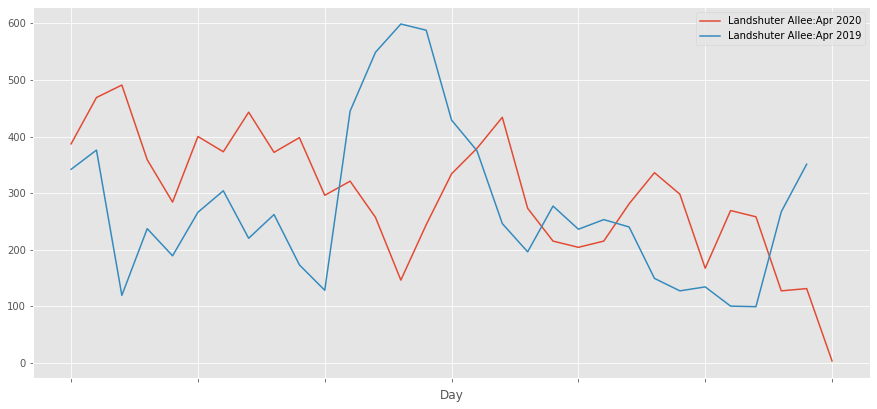

In [56]:
# fill missing values 
for (columnName, columnData) in dataPm2x5_2019_hourly.iteritems():
    dataPm2x5_2019_hourly[columnName] =  dataPm2x5_2019_hourly[columnName].fillna(method='ffill')
print(dataPm2x5_2019_hourly.isnull().sum())
# change hour format
dataPm2x5_2019_hourly['Zeitpunkt']=dataPm2x5_2019_hourly['Zeitpunkt'].replace({'24:00':'00:00'}, regex=True)
# delete last irrelevant row in the dataset
dataPm2x5_2019_hourly.drop(dataPm2x5_2019_hourly.tail(1).index,inplace=True)
# transform the hourly data to daily data
dataPm2x5_2019_hourly['Zeitpunkt']=pd.to_datetime(dataPm2x5_2019_hourly['Zeitpunkt'], infer_datetime_format=True)
# set Zeitpunkt as index of the dataset
dataPm2x5_2019_hourly = dataPm2x5_2019_hourly.set_index(['Zeitpunkt'])
print(dataPm2x5_2019_hourly)
dataPm2x5_2019_daily=dataPm2x5_2019_hourly.resample('D').sum()
print(dataPm2x5_2019_daily)
# extract the data of January and April 2019
dataPm2x5_2019_Jan_daily = dataPm2x5_2019_daily['2019-01-01':'2019-01-31']
dataPm2x5_2019_Apr_daily = dataPm2x5_2019_daily['2019-04-01':'2019-04-30']
# describe the features
print(dataPm2x5_2019_daily.describe())
# plot the change of emissions between April 2019/2020 in the district Landshuter Alle
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(211)
ax.plot(np.arange(dataPm2x5_Apr_daily.shape[0]),dataPm2x5_Apr_daily['München/Landshuter Allee'],label='Landshuter Allee:Apr 2020')
ax.plot(np.arange(dataPm2x5_2019_Apr_daily.shape[0]),dataPm2x5_2019_Apr_daily['München/Landshuter Allee'],label='Landshuter Allee:Apr 2019')
ax.legend()
ax.set_xticklabels([])
plt.xlabel('Day')
plt.show()

# CO emissions in Jan.2020

In [57]:
# read the data
dataCO_Jan_hourly = pd.read_excel('CO_2020_01.xls',header=2,usecols =['Zeitpunkt','München/Landshuter Allee','München/Stachus'] )
# shape and data types of the data
print(dataCO_Jan_hourly.shape)
print(dataCO_Jan_hourly.dtypes)

# select numeric columns
df_numeric = dataCO_Jan_hourly.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = dataCO_Jan_hourly.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(744, 3)
Zeitpunkt                   datetime64[ns]
München/Landshuter Allee            object
München/Stachus                    float64
dtype: object
['München/Stachus']
['Zeitpunkt' 'München/Landshuter Allee']


In [58]:
print(dataCO_Jan_hourly)
for (columnName, columnData) in dataCO_Jan_hourly.iteritems():
    dataCO_Jan_hourly[columnName] = dataCO_Jan_hourly[columnName].replace('    # ', np.nan)
print(dataCO_Jan_hourly.isnull().sum())

              Zeitpunkt München/Landshuter Allee  München/Stachus
0   2020-01-01 01:00:00                      0.7              0.5
1   2020-01-01 02:00:00                      0.8              0.6
2   2020-01-01 03:00:00                      0.7              0.6
3   2020-01-01 04:00:00                      0.7              0.6
4   2020-01-01 05:00:00                      0.5              0.6
..                  ...                      ...              ...
739 2020-01-31 20:00:00                      0.5              0.4
740 2020-01-31 21:00:00                      0.4              0.4
741 2020-01-31 22:00:00                      0.4              0.3
742 2020-01-31 23:00:00                      0.3              0.4
743 2020-02-01 00:00:00                      0.4              0.3

[744 rows x 3 columns]
Zeitpunkt                   0
München/Landshuter Allee    5
München/Stachus             0
dtype: int64


Zeitpunkt                   0
München/Landshuter Allee    0
München/Stachus             0
dtype: int64
            München/Landshuter Allee  München/Stachus
Day                                                  
2020-01-01                      11.1             10.4
2020-01-02                      16.4             12.6
2020-01-03                      13.8              9.9
2020-01-04                       7.4              8.0
2020-01-05                      10.1              8.9
2020-01-06                      14.8              9.3
2020-01-07                      16.7             10.5
2020-01-08                      14.9              8.9
2020-01-09                      16.7             10.3
2020-01-10                      10.8              8.4
2020-01-11                       8.6              8.0
2020-01-12                      13.2              9.2
2020-01-13                      11.3              9.3
2020-01-14                      16.5              9.9
2020-01-15                      1

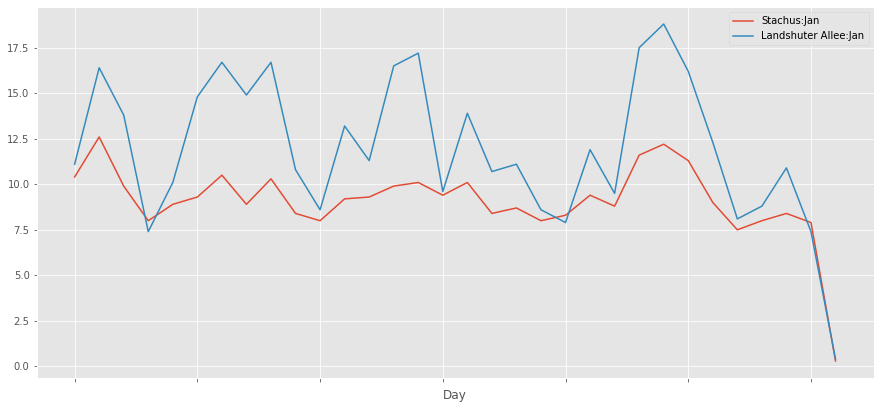

In [59]:
# fill missing values
for (columnName, columnData) in dataCO_Jan_hourly.iteritems():
    dataCO_Jan_hourly[columnName] =  dataCO_Jan_hourly[columnName].fillna(method='ffill')
print(dataCO_Jan_hourly.isnull().sum())
# transform hourly data to daily data
dataCO_Jan_hourly[['Day','Hour']] = dataCO_Jan_hourly['Zeitpunkt'].astype(str).str.split(expand=True) 
dataCO_Jan_daily = dataCO_Jan_hourly.groupby(['Day']).sum()  
print(dataCO_Jan_daily)
# describe the features
print(dataCO_Jan_daily.describe())
# plot the difference of emissions in Stachus and Landshuter Alle
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(211)
ax.plot(np.arange(dataCO_Jan_daily.shape[0]),dataCO_Jan_daily['München/Stachus'],label='Stachus:Jan')
ax.plot(np.arange(dataCO_Jan_daily.shape[0]),dataCO_Jan_daily['München/Landshuter Allee'],label='Landshuter Allee:Jan')
ax.legend()
ax.set_xticklabels([])
plt.xlabel('Day')
plt.show()

# CO emissions in Apr.2020

In [60]:
# read the data
dataCO_Apr_hourly = pd.read_excel('CO_2020_04.xls',header=2,usecols =['Zeitpunkt','München/Landshuter Allee','München/Stachus'] )
# shape and data types of the data
print(dataCO_Apr_hourly.shape)
print(dataCO_Apr_hourly.dtypes)

# select numeric columns
df_numeric = dataCO_Apr_hourly.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = dataCO_Apr_hourly.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(720, 3)
Zeitpunkt                   datetime64[ns]
München/Landshuter Allee           float64
München/Stachus                    float64
dtype: object
['München/Landshuter Allee' 'München/Stachus']
['Zeitpunkt']


In [61]:
print(dataCO_Apr_hourly)
# find missing values
for (columnName, columnData) in dataCO_Apr_hourly.iteritems():
    dataCO_Apr_hourly[columnName] = dataCO_Apr_hourly[columnName].replace('    # ', np.nan)
print(dataCO_Apr_hourly.isnull().sum())

              Zeitpunkt  München/Landshuter Allee  München/Stachus
0   2020-04-01 01:00:00                       0.2              0.2
1   2020-04-01 02:00:00                       0.2              0.2
2   2020-04-01 03:00:00                       0.2              0.3
3   2020-04-01 04:00:00                       0.3              0.3
4   2020-04-01 05:00:00                       0.3              0.3
..                  ...                       ...              ...
715 2020-04-30 20:00:00                       0.5              0.2
716 2020-04-30 21:00:00                       0.3              0.2
717 2020-04-30 22:00:00                       0.3              0.2
718 2020-04-30 23:00:00                       0.3              0.2
719 2020-05-01 00:00:00                       0.2              0.2

[720 rows x 3 columns]
Zeitpunkt                   0
München/Landshuter Allee    0
München/Stachus             0
dtype: int64


Zeitpunkt                   0
München/Landshuter Allee    0
München/Stachus             0
dtype: int64
            München/Landshuter Allee  München/Stachus
Day                                                  
2020-04-01                       7.2              6.0
2020-04-02                      10.8              8.0
2020-04-03                       9.8              7.1
2020-04-04                       6.1              5.8
2020-04-05                       5.1              4.9
2020-04-06                      11.2              8.0
2020-04-07                       8.7              7.2
2020-04-08                      12.3              7.6
2020-04-09                      11.8              7.8
2020-04-10                       8.4              6.0
2020-04-11                       8.5              6.3
2020-04-12                       9.5              5.4
2020-04-13                       5.8              4.8
2020-04-14                       6.6              5.1
2020-04-15                       

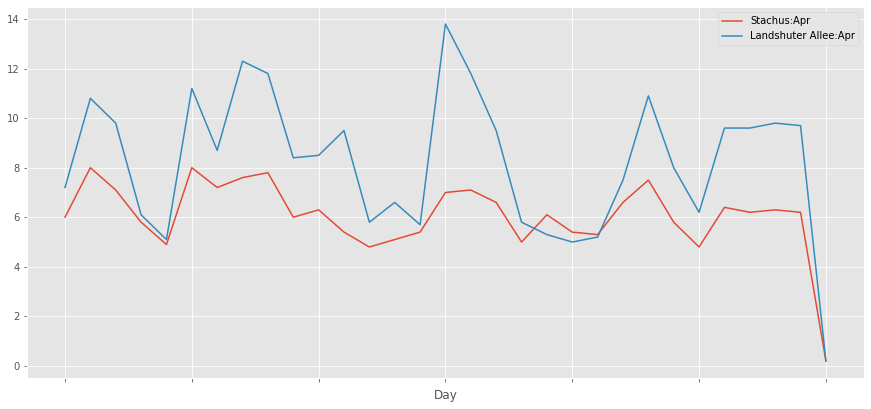

In [62]:
# replace missing values
for (columnName, columnData) in dataCO_Apr_hourly.iteritems():
    dataCO_Apr_hourly[columnName] =  dataCO_Apr_hourly[columnName].fillna(method='ffill')
print(dataCO_Apr_hourly.isnull().sum())
# transform hourly data to daily data
dataCO_Apr_hourly[['Day','Hour']] = dataCO_Apr_hourly['Zeitpunkt'].astype(str).str.split(expand=True) 
dataCO_Apr_daily = dataCO_Apr_hourly.groupby(['Day']).sum()  
print(dataCO_Apr_daily)
# describe the features
print(dataCO_Apr_daily.describe())
# plot the difference of emissions in Stachus and Landshuter Alle during the month of April 
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(211)
ax.plot(np.arange(dataCO_Apr_daily.shape[0]),dataCO_Apr_daily['München/Stachus'],label='Stachus:Apr')
ax.plot(np.arange(dataCO_Apr_daily.shape[0]),dataCO_Apr_daily['München/Landshuter Allee'],label='Landshuter Allee:Apr')
ax.legend()
ax.set_xticklabels([])
plt.xlabel('Day')
plt.show()

# CO emissions during 2019

In [63]:
# read the data
dataCO_2019_hourly = pd.read_excel('CO_2019.xlsx',header=1,usecols =['Zeitpunkt','München/Landshuter Allee','München/Stachus'] )
# shape and data types of the data
print(dataCO_2019_hourly.shape)
print(dataCO_2019_hourly.dtypes)

# select numeric columns
df_numeric = dataCO_2019_hourly.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = dataCO_2019_hourly.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(8761, 3)
Zeitpunkt                   object
München/Landshuter Allee    object
München/Stachus             object
dtype: object
[]
['Zeitpunkt' 'München/Landshuter Allee' 'München/Stachus']


In [64]:
# find missing values
print(dataCO_2019_hourly)
for (columnName, columnData) in dataCO_2019_hourly.iteritems():
    dataCO_2019_hourly[columnName] = dataCO_2019_hourly[columnName].replace('    # ', np.nan)
print(dataCO_2019_hourly.isnull().sum())

             Zeitpunkt München/Landshuter Allee München/Stachus
0     01.01.2019 01:00                      0.6             0.5
1     01.01.2019 02:00                      0.5             0.4
2     01.01.2019 03:00                      0.4             0.3
3     01.01.2019 04:00                      0.3             0.3
4     01.01.2019 05:00                      0.2             0.3
...                ...                      ...             ...
8756  31.12.2019 21:00                      0.6             0.4
8757  31.12.2019 22:00                      0.4             0.4
8758  31.12.2019 23:00                      0.5             0.4
8759  31.12.2019 24:00                      0.5             0.4
8760               0/0                      NaN             NaN

[8761 rows x 3 columns]
Zeitpunkt                    0
München/Landshuter Allee    18
München/Stachus             15
dtype: int64


Zeitpunkt                   0
München/Landshuter Allee    0
München/Stachus             0
dtype: int64
                     München/Landshuter Allee  München/Stachus
Zeitpunkt                                                     
2019-01-01 01:00:00                       0.6              0.5
2019-01-01 02:00:00                       0.5              0.4
2019-01-01 03:00:00                       0.4              0.3
2019-01-01 04:00:00                       0.3              0.3
2019-01-01 05:00:00                       0.2              0.3
...                                       ...              ...
2019-12-31 20:00:00                       0.9              0.4
2019-12-31 21:00:00                       0.6              0.4
2019-12-31 22:00:00                       0.4              0.4
2019-12-31 23:00:00                       0.5              0.4
2019-12-31 00:00:00                       0.5              0.4

[8760 rows x 2 columns]
            München/Landshuter Allee  München/Stachus

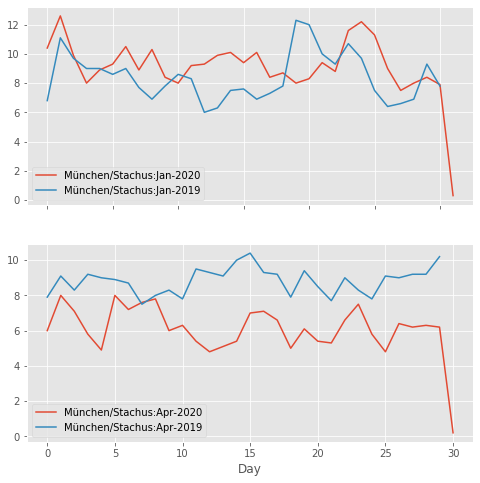

In [65]:
# replace missing values
for (columnName, columnData) in dataCO_2019_hourly.iteritems():
    dataCO_2019_hourly[columnName] =  dataCO_2019_hourly[columnName].fillna(method='ffill')
print(dataCO_2019_hourly.isnull().sum())
# transform hour format
dataCO_2019_hourly['Zeitpunkt']=dataCO_2019_hourly['Zeitpunkt'].replace({'24:00':'00:00'}, regex=True)
# delete last irrelevant row in the dataset
dataCO_2019_hourly.drop(dataCO_2019_hourly.tail(1).index,inplace=True)
# transform hourly data to daily data
dataCO_2019_hourly['Zeitpunkt']=pd.to_datetime(dataCO_2019_hourly['Zeitpunkt'], infer_datetime_format=True)
dataCO_2019_hourly = dataCO_2019_hourly.set_index(['Zeitpunkt'])
print(dataCO_2019_hourly)
dataCO_2019_daily=dataCO_2019_hourly.resample('D').sum()
print(dataCO_2019_daily)
# extract data of January and April 2019
dataCO_2019_Jan_daily = dataCO_2019_daily['2019-01-01':'2019-01-31']
dataCO_2019_Apr_daily = dataCO_2019_daily['2019-04-01':'2019-04-30']
# describe the features of the dataset
print(dataCO_2019_daily.describe())
# plot the difference of the emissions in Stachus between the months of Jan and Apr 2019/2020
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(np.arange(dataCO_Jan_daily.shape[0]),dataCO_Jan_daily['München/Stachus'],label='München/Stachus:Jan-2020')
ax1.plot(np.arange(dataCO_2019_Jan_daily.shape[0]),dataCO_2019_Jan_daily['München/Stachus'],label='München/Stachus:Jan-2019')
ax1.legend()

ax2.plot(np.arange(dataCO_Apr_daily.shape[0]),dataCO_Apr_daily['München/Stachus'],label='München/Stachus:Apr-2020')
ax2.plot(np.arange(dataCO_2019_Apr_daily.shape[0]),dataCO_2019_Apr_daily['München/Stachus'],label='München/Stachus:Apr-2019')

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
ax2.legend()
plt.xlabel('Day')
plt.show()